# Web Scraping Assignment (Graded)

The objective of this assignment is to save the data from the main table of the web page https://en.wikipedia.org/wiki/List_of_largest_oil_and_gas_companies_by_revenue and also add a small description of each one of those companies.

To complete this assignment you can use the previous exercise as a start point.

In [11]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_largest_oil_and_gas_companies_by_revenue")
soup = BeautifulSoup(page.content, 'html.parser')
right_table = soup.find('table', class_='wikitable sortable')
A = []
B = []
C = []
D = []
E = []

In [12]:
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells)==3:
        A.append(str(cells[0].find('a').get('title')))
        B.append(str(cells[1].find('a').get('title')))
        C.append(float(str(cells[2].find(text=True)).replace('**','')))
        D.append(str(cells[1].find('a').get('href')))

Now we can construct a dataframe with the previous data

In [13]:
df = pd.DataFrame(A, columns=['Country'])
df['Company Name'] = B
df['Revenue 2017 (US$ Billion)'] = C
df['Link'] = D

In [14]:
df

,Country,Company Name,Revenue 2017 (US$ Billion),Link
0,Saudi Arabia,Saudi Aramco,455.490,/wiki/Saudi_Aramco
1,China,Sinopec,448.000,/wiki/Sinopec
2,China,China National Petroleum Corporation,428.620,/wiki/China_National_Petroleum_Corporation
3,China,PetroChina,367.982,/wiki/PetroChina
4,United States,Exxon Mobil,268.900,/wiki/Exxon_Mobil
5,Netherlands,Royal Dutch Shell,265.000,/wiki/Royal_Dutch_Shell
6,Kuwait,Kuwait Petroleum Corporation,251.940,/wiki/Kuwait_Petroleum_Corporation
7,United Kingdom,BP,222.800,/wiki/BP
8,France,Total SA,212.000,/wiki/Total_SA
9,Russia,Lukoil,144.170,/wiki/Lukoil


Now we are going to use each one of the links to acces to the wikipedia article of each company and obtain the first paragraph of that page

In [15]:
for link in df['Link']:
    new_link = 'https://en.wikipedia.org' + link
    page = requests.get(new_link)
    soup = BeautifulSoup(page.content, 'html.parser')
    first_paragraph = soup.p.text
    E.append(first_paragraph)

In [16]:
df['Summary'] = E
df = df.drop('Link',1)
df

,Country,Company Name,Revenue 2017 (US$ Billion),Summary
0,Saudi Arabia,Saudi Aramco,455.490,Saudi Aramco (Arabic: أرامكو السعودية‎ ʾArāmkō...
1,China,Sinopec,448.000,China Petroleum & Chemical Corporation (中国石油化工...
2,China,China National Petroleum Corporation,428.620,China National Petroleum Corporation (CNPC) (s...
3,China,PetroChina,367.982,PetroChina Company Limited (simplified Chinese...
4,United States,Exxon Mobil,268.900,Exxon Mobil Corporation (stylized as ExxonMobi...
5,Netherlands,Royal Dutch Shell,265.000,"Royal Dutch Shell plc (LSE: RDSA, RDSB), commo..."
6,Kuwait,Kuwait Petroleum Corporation,251.940,Kuwait Petroleum Corporation (Arabic: مؤسسة ال...
7,United Kingdom,BP,222.800,"BP plc,[5][6] formerly British Petroleum, is a..."
8,France,Total SA,212.000,Total S.A. (French pronunciation: ​[tɔtal]; En...
9,Russia,Lukoil,144.170,"The PJSC Lukoil Oil Company (Russian: Лукойл, ..."


And what if we want to do some charts?

let's use a different dataset from this web page: https://es.wikipedia.org/wiki/Demograf%C3%ADa_de_Chile

In [17]:
page = requests.get("https://es.wikipedia.org/wiki/Demograf%C3%ADa_de_Chile")
soup = BeautifulSoup(page.content, 'html.parser')
right_table = soup.find('table', class_='toccolours')
H = []
I = []

In [18]:
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    states = row.findAll('th')
    if len(cells)==2:        
        H.append(int(states[0].find(text=True)))
        I.append(str(cells[0].find(text=True)))

In [19]:
I

['750\xa0000',
 '800\xa0000',
 '1\xa0010\xa0336',
 '1\xa0083\xa0801',
 '1\xa0439\xa0120',
 '1\xa0819\xa0223',
 '2\xa0075\xa0971',
 '2\xa0507\xa0005',
 '2\xa0695\xa0625',
 '3\xa0231\xa0022',
 '3\xa0730\xa0235',
 '4\xa0287\xa0445',
 '5\xa0023\xa0539',
 '5\xa0932\xa0995',
 '7\xa0374\xa0115',
 '8\xa0884\xa0768',
 '11\xa0329\xa0736',
 '13\xa0348\xa0401',
 '15\xa0116\xa0435',
 '16\xa0572\xa0475',
 '17\xa0574\xa0003']

In [20]:
for i in range(0,len(I)):
    I[i] = int(I[i].replace('\xa0',''))
I

[750000,
 800000,
 1010336,
 1083801,
 1439120,
 1819223,
 2075971,
 2507005,
 2695625,
 3231022,
 3730235,
 4287445,
 5023539,
 5932995,
 7374115,
 8884768,
 11329736,
 13348401,
 15116435,
 16572475,
 17574003]

In [21]:
df1=pd.DataFrame(H,columns=['Year'])
df1['Population']=I
df1

,Year,Population
0,1800,750000
1,1810,800000
2,1835,1010336
3,1843,1083801
4,1854,1439120
5,1865,1819223
6,1875,2075971
7,1885,2507005
8,1895,2695625
9,1907,3231022


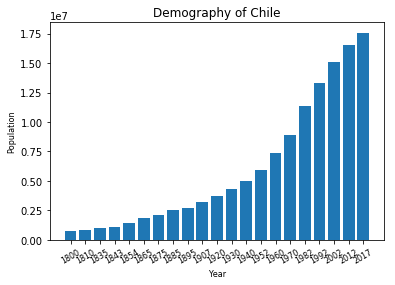

In [23]:
import matplotlib.pyplot as plt
import numpy as np

index = np.arange(len(df1['Year']))
plt.bar(index, df1['Population'])
plt.xlabel('Year', fontsize=8)
plt.ylabel('Population', fontsize=8)
plt.xticks(index, df1['Year'], fontsize=8, rotation=30)
plt.title('Demography of Chile')
plt.show()

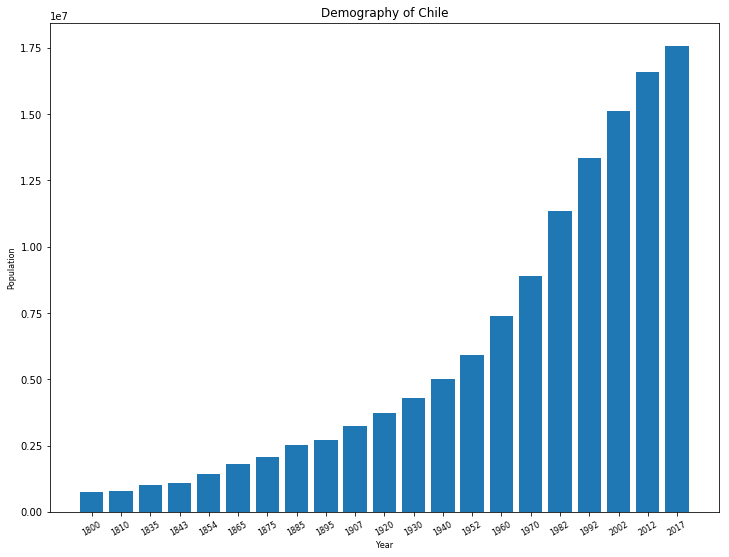

In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

index = np.arange(len(df1['Year']))
plt.bar(index, df1['Population'])
plt.xlabel('Year', fontsize=8)
plt.ylabel('Population', fontsize=8)
plt.xticks(index, df1['Year'], fontsize=8, rotation=30)
plt.title('Demography of Chile')
plt.show()